In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.8'

单标签、多分类问题
路透社数据集reuters


## reuters 路透社数据集

~~~
train_data     (8982,)    array([list1 ,list2 ... , list8982], dtype=object)    [1,9999]
train_labels    (8982,)    array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)    [0,45]
test_data      (2246,)   array([list1 ,list2 ... , list2246], dtype=object)     [1,9999]
test_labels     (2246,)   array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)     [0,45]
~~~

In [4]:
from keras.datasets import reuters
import numpy as np
#(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

In [64]:
word_index = reuters.get_word_index()      # 字典
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 数据预处理one-hot编码

In [86]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)  # (8982, 10000)
x_test = vectorize_sequences(test_data)    # (2246, 10000)

将标签向量化有两种方法：  
1、标签列表转化为整数张量  
2、使用one-hot编码，也叫分类编码（categorical encoding）

In [87]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)  # (8982, 46)
one_hot_test_labels = to_one_hot(test_labels)    # (2246, 46)

In [84]:
from keras.utils.np_utils import to_categorical     # keras 内置的one-hot操作

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 构建网络

In [88]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## 验证网络

In [89]:
x_val = x_train[:1000]                # 前1000个数据作为验证
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [90]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 256us/step - loss: 2.5326 - acc: 0.4954 - val_loss: 1.7237 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 1s 149us/step - loss: 1.4499 - acc: 0.6864 - val_loss: 1.3495 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.1000 - acc: 0.7643 - val_loss: 1.1727 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.8725 - acc: 0.8141 - val_loss: 1.0798 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.7055 - acc: 0.8472 - val_loss: 0.9851 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.5683 - acc: 0.8794 - val_loss: 0.9401 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 161us/step - loss: 0.4607 - a

## 绘图

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

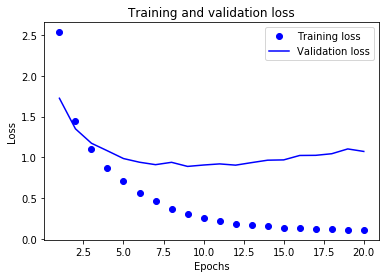

In [92]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

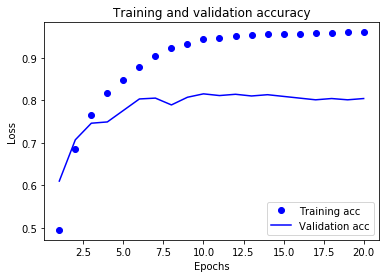

In [18]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 从头开始训练

In [98]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 225us/step - loss: 2.6785 - acc: 0.5163 - val_loss: 1.7800 - val_acc: 0.6470
Epoch 2/8
7982/7982 [==============================] - 1s 160us/step - loss: 1.4534 - acc: 0.7036 - val_loss: 1.3325 - val_acc: 0.7050
Epoch 3/8
7982/7982 [==============================] - 1s 158us/step - loss: 1.0707 - acc: 0.7729 - val_loss: 1.1677 - val_acc: 0.7420
Epoch 4/8
7982/7982 [==============================] - 1s 150us/step - loss: 0.8454 - acc: 0.8206 - val_loss: 1.0790 - val_acc: 0.7510
Epoch 5/8
7982/7982 [==============================] - 1s 160us/step - loss: 0.6767 - acc: 0.8561 - val_loss: 0.9885 - val_acc: 0.7950
Epoch 6/8
7982/7982 [==============================] - 1s 153us/step - loss: 0.5411 - acc: 0.8875 - val_loss: 0.9413 - val_acc: 0.8070
Epoch 7/8
7982/7982 [==============================] - 1s 152us/step - loss: 0.4391 - acc: 0.9080 - val_loss: 0.9254 - val_acc: 0.8070
Epoch 8

2246/2246 [==============================] - 0s 176us/step


In [97]:
import copy             # 测试完全随机精度
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19056099732858414

## 评估、预测

In [109]:
predictions = model.predict(x_test)
predictions.shape

(2246, 46)

In [110]:
np.argmax(predictions[0])
np.argmax(predictions,axis=1)

3

array([ 3, 10,  1, ...,  3,  4,  1], dtype=int64)

## 处理标签和损失的另一种方法

In [113]:
y_train = np.array(train_labels)     # 标签转为整数张量，注意是整数，不是浮点数。
y_test = np.array(test_labels)

In [114]:
train_labels
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [36]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

`sparse_categorical_crossentropy` 和`categorical_crossentropy`在数学上完全相同，只是二者的接口不同